<a href="https://colab.research.google.com/github/zizo155/sentimental-analysis/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [110]:
df = pd.read_csv("/content/drive/MyDrive/sentimentdataset.csv")

In [111]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [112]:
df.tail(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
722,723,727,Winning a friendly sports competition against ...,Happy,2023-10-20 14:15:00,SportsVictoryHighSchool,Twitter,#SportsTriumph #HighSchoolAthletics,26.0,50.0,USA,2023,10,20,14
723,724,728,Receiving a heartfelt letter from a pen pal in...,Happy,2023-10-21 17:30:00,PenPalConnectionHighSchool,Facebook,#GlobalFriendship #HighSchoolCorrespondence,23.0,45.0,Canada,2023,10,21,17
724,725,729,Creating a beautiful mural with fellow art ent...,Happy,2023-10-22 20:45:00,MuralCreationHighSchool,Instagram,#ArtCollaboration #HighSchoolCreativity,22.0,43.0,UK,2023,10,22,20
725,726,730,Participating in a school-wide art exhibition....,Happy,2015-11-10 16:45:00,ArtExhibitionJoyHighSchool,Instagram,#ArtisticExpression #HighSchoolCreativity,23.0,44.0,USA,2015,11,10,16
726,727,731,Achieving a personal best in a track and field...,Happy,2016-09-14 12:30:00,TrackFieldSuccessHighSchool,Twitter,#AthleticAchievement #HighSchoolSports,26.0,51.0,Canada,2016,9,14,12
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [113]:
df.shape

(732, 15)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [115]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [116]:
#null values
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [117]:
df.duplicated().sum()

0

In [118]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [119]:
#prints the number of distinct values present in each column
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [120]:
# drop unnecessary columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

In [121]:
#time stamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [122]:
# mapping
month_mapping = {
    1: 'Jnuary',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

In [123]:
# cleaning texts
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

In [124]:
df['Platform'].value_counts()

Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: count, dtype: int64

In [125]:
# remove leading and trailing whitespace characters
df['Platform'] = df['Platform'].str.strip()

In [126]:
df['Country'].value_counts()

Country
 USA               59
 USA               55
 UK                49
 Canada            44
 Australia         41
                   ..
 Netherlands        1
 USA                1
 Germany            1
 France             1
 USA                1
Name: count, Length: 115, dtype: int64

In [127]:
df['Country'] = df['Country'].str.strip()

In [128]:
df

,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,Jnuary,Sunday,enjoy beauti day park
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,Jnuary,Sunday,traffic terribl morn
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,Jnuary,Sunday,finish amaz workout
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,Jnuary,Sunday,excit upcom weekend getaway
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,Jnuary,Sunday,tri new recip dinner tonight
...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,August,Friday,collabor scienc project receiv recognit region...
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,June,Friday,attend surpris birthday parti organ friend sur...
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,April,Friday,success fundrais school chariti initi joy give...
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,February,Saturday,particip multicultur festiv celebr divers musi...


In [129]:
df.isnull().sum()

Text           0
Timestamp      0
User           0
Platform       0
Retweets       0
Likes          0
Country        0
Year           0
Month          0
Day_of_Week    0
Clean_Text     0
dtype: int64

In [130]:
df1 = df.copy()

In [131]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [132]:
#How many likes people n different countries give

no_duplicated.groupby(['Country']).Likes.agg([len, min, max]).sort_values(by='len', ascending=False)

,len,min,max
Country,,,
USA,184,10.0,80.0
UK,140,15.0,70.0
Canada,132,10.0,80.0
Australia,70,15.0,80.0
India,67,15.0,80.0
Brazil,17,30.0,80.0
France,16,35.0,60.0
Japan,15,35.0,70.0
Germany,14,30.0,70.0


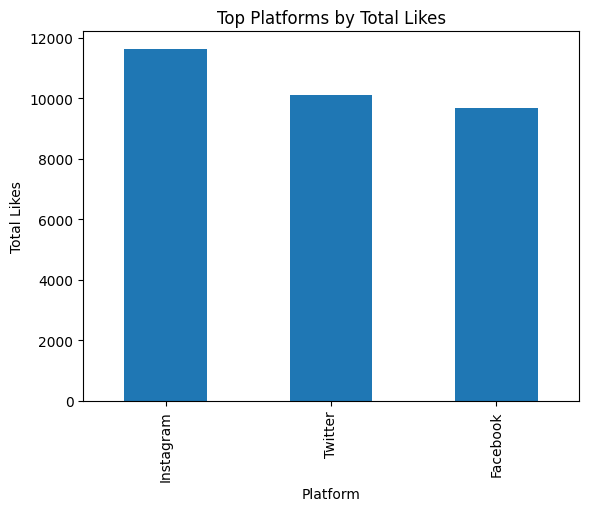

In [133]:
# which platforms are on top?
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

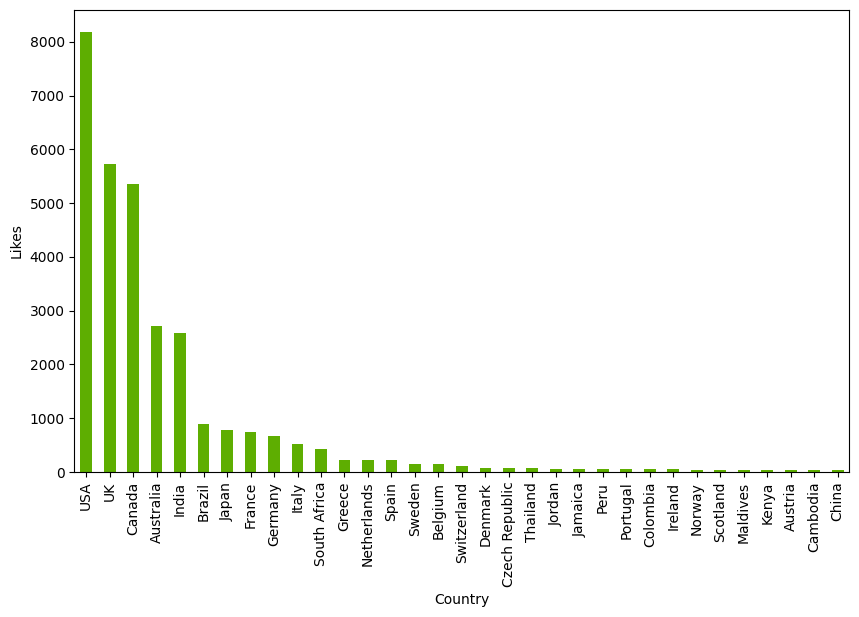

In [134]:
likes_per_country = no_duplicated.groupby(['Country']).Likes.sum().sort_values(ascending=False)

likes_per_country.plot(kind='bar', color = '#5eAE01', figsize=(10, 6) )
plt.ylabel('Likes')
plt.show()

In [135]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()

In [136]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [137]:


model = linear_model.LinearRegression()
no_duplicated = df.drop_duplicates(subset=['Text','Timestamp', 'Platform'], keep='first')
# Train the model using the training sets
x = no_duplicated['Likes'].values.reshape((-1, 1))
y = no_duplicated['Retweets'].values

model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
m = model.coef_[0]
b = model.intercept_

#print(f"intercept: {model.intercept_}")
#print(f"slope: {model.coef_}")
print()
print(f"Regression: y =  {model.intercept_} + {model.coef_[0]} x")

coefficient of determination: 0.9969493990350459

Regression: y =  0.04219218542080938 + 0.5003783653463314 x


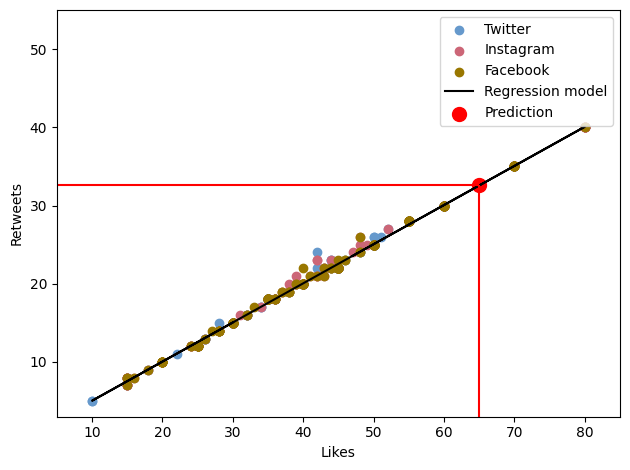

In [138]:
twitter = no_duplicated[no_duplicated["Platform"] == 'Twitter']
instagram = no_duplicated[no_duplicated["Platform"] == 'Instagram']
facebook = no_duplicated[no_duplicated["Platform"] == 'Facebook']

x_pred = 65
plt.scatter(twitter['Likes'], twitter['Retweets'], color='#6699CC', label='Twitter')
plt.scatter(instagram['Likes'], instagram['Retweets'], color='#CC6677', label='Instagram')
plt.scatter(facebook['Likes'], facebook['Retweets'], color='#997700', label='Facebook')

plt.plot(no_duplicated['Likes'], m*no_duplicated['Likes'] + b, 'k', label='Regression model')

plt.scatter(x_pred, model.predict(np.array([[x_pred]]))[0], color = 'r', s=100, label='Prediction')
plt.vlines(x = x_pred, ymin=3, ymax= model.predict(np.array([[x_pred]]))[0], color = 'r', linestyle = '-')
plt.hlines(y = model.predict(np.array([[x_pred]]))[0], xmin= 5, xmax= x_pred, color = 'r', linestyle = '-')
plt.xlim([5, 85])
plt.ylim([3, 55])
plt.legend(loc='best')

plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.tight_layout()
plt.show()